<div style="text-align: center;">

  <!-- Logotipo -->
  <img src="img/LogoUesc.png" alt="UESC" style="width: 60px; display: block; margin: 0 auto 5px auto;">

  <!-- Cabeçalho -->
  <div style="font-size: 20px;"><strong>UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC</strong></div>
  <div style="font-size: 18px;">DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO</div>
  <div style="font-size: 18px;">ENGENHARIA QUÍMICA</div>

  <hr style="margin: 20px 0; border: 1px solid #0074B7;">

  <!-- Título do Trabalho -->
  <div style="font-size: 22px; font-weight: bold; margin-bottom: 10px;">Instrumentação e Controle de Qualidade</div>
  <div style="font-size: 20px; font-weight: bold; margin-bottom: 10px;">Cálculo de Volume em Tanque de Armazenamento Industrial</div>

  <!-- Autor e orientador -->
  <div style="font-size: 18px;">Prof. Dr. E.R.Edwards</div>

<hr style="margin: 20px 0; border: 1px solid #0074B7;">
  <!-- Data -->
<!-- <div style="font-size: 16px; margin-top: 15px;">Ilhéus - BA, Abril de 2025</div> -->
</div>

<div style="background-color: #e6f2ff; border-left: 6px solid #0074B7; padding: 10px; font-size: 16px;"><strong>Cálculo do Volume em um Tanque Cilíndrico Horizontal</strong> 
</div>

__Contextualização do Problema__

Na Engenharia Química e em diversas áreas industriais, um dos principais desafios está no **controle de nível de fluidos em tanques de armazenamento**. Esse aspecto é especialmente relevante na **indústria de processamento de petróleo**, onde o armazenamento seguro e eficiente de grandes volumes de fluidos é fundamental para a operação contínua dos processos.  

Entre as diversas geometrias empregadas, os **tanques cilíndricos horizontais (deitados)** são amplamente utilizados devido à sua praticidade construtiva e operacional. Nesses casos, o **comprimento do tanque** $L$ é constante, enquanto a **altura do fluido** $h(t)$ varia com o tempo em função da vazão de entrada ou saída.  

O cálculo do **volume de fluido armazenado** pode ser expresso genericamente como:

$$
V(t) = A(h(t)) \cdot L
$$

onde $A(h(t))$ corresponde à **área molhada da seção transversal** do cilindro. Entretanto, quando o tanque encontra-se **inclinado**, a determinação dessa área não é trivial, pois a altura $h(t)$ deixa de ser uma medida linear simples e passa a depender da geometria circular submersa em função do tempo.  

Diante disso, este trabalho apresenta o **desenvolvimento matemático e computacional** para determinar a função $h(t)$, calcular a área molhada correspondente e, por fim, obter o volume do tanque inclinado de forma precisa. O objetivo é fornecer uma base teórica e prática para aplicações industriais, destacando a relevância do problema no contexto do **armazenamento e transporte de fluidos na indústria de petróleo**.



<img src="img/Caminhão_tanque_sob céu_azul_claro.png" alt="UESC" style="width: 600px; display: block; margin: 0 auto 5px auto;">
<p style="text-align: center;"><strong>Figura: Caminhão tanque gerado por IA.</strong></p>

__Área da seção molhada $A(h)$.__

Existem duas formas equivalentes úteis:

1 - Usando o ângulo central $\theta$ (em rad):

$$ \theta (t) = 2 arccos(\frac{R - h}{R}) $$

A área do segmento circular é 

$$ A(h) = \frac{R^2}{2}(\theta (h) - sin \theta (h))) $$

2 - Formula direta em função de $h$.

$$  A(h) = R^2 arccoc (\frac{R - h}{R}) - (R-h) \sqrt{2Rh - h^2} $$

Ambas são equivalentes (forma com $\theta$ às vezes é mais intuitiva). Note que as expressões assumem $0  \le h  \le 2R$. Casos limites:

- $h = 0 => A = 0$
- $h = R => A = \frac{1}{2} \pi R^2 \,\ (\text{meia seção})$
- $h = 2R => A = \pi R^2$










__Volume do líquido no tanque__.

Se o comprimento do tanque é $L$, o volume é simplesmente:

$$ V(h) = A(h)L $$

ou explicitamente

$$ V(h) = [ R^2 arccos(\frac{R - h}{R}) - (R - h) \sqrt{2Rh - h^2} ]L $$








__Exemplo de aplicação em Programação em Python__

In [17]:
import math

def area_segmento(R, h):
    if h <= 0:
        return 0.0
    if h >= 2*R:
        return math.pi * R*R
    theta = 2*math.acos((R-h)/R)
    return 0.5 * R*R * (theta - math.sin(theta))

def volume_tanque(R, h, L):
    return area_segmento(R,h) * L

# Exemplo
R = 1.0      # raio em m
h = 0.8      # altura do líquido em m
L = 5.0      # comprimento do tanque em m

A = area_segmento(R,h)
V = volume_tanque(R,h,L)
print(f"Área = {A:.6f} m^2, Volume = {V:.6f} m^3")

Área = 1.173479 m^2, Volume = 5.867396 m^3


Podemos gerar um gráfico do volume no tanque horizontal em função da altura. As linhas horizontais correspondem as frações em porcentagem de líquido no tanque.

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

def area_segmento(R, h):
    if h <= 0:
        return 0.0
    if h >= 2*R:
        return math.pi * R*R
    theta = 2*math.acos((R-h)/R)
    return 0.5 * R*R * (theta - math.sin(theta))

def volume_tanque(R, h, L):
    return area_segmento(R,h) * L

# Parâmetros do tanque
R = 1.0   # raio em m
L = 5.0   # comprimento em m

# Vetor de alturas h de 0 a 2R
h_vals = np.linspace(0, 2*R, 200)
V_vals = [volume_tanque(R,h,L) for h in h_vals]

# Volume total
V_total = volume_tanque(R, 2*R, L)

# Frações desejadas
fractions = [0.25, 0.5, 0.75]
V_marks = [f*V_total for f in fractions]

# Plotar gráfico
plt.figure(figsize=(8,5))
plt.plot(h_vals, V_vals, label="Volume de líquido no tanque")

# Linhas auxiliares
for f, Vmark in zip(fractions, V_marks):
    plt.axhline(y=Vmark, color='r', linestyle='--', linewidth=1)
    plt.text(2*R*0.98, Vmark, f"{int(f*100)}% V", va='center', ha='right', color='r')

plt.xlabel("Altura do líquido h (m)")
plt.ylabel("Volume V (m³)")
plt.title("Volume do tanque cilíndrico horizontal em função da altura do líquido")
plt.grid(True)
plt.legend()
plt.show()

Abaixo esta um diagrama ilustrando (circulo, linha de superfície para $h < R$) e $h>R$, o eixo, o triângulo e o ângulo $\theta$ esta mostrado na figua abaixo para facilitar a visualização.

<img src="img/Tanque_circulo_fig_1.png" alt="UESC" style="width: 450px; display: block; margin: 0 auto 5px auto;">
<p style="text-align: center;"><strong>Figura: Diagrama do circulo de raio R=1 mostrando o líquido até a altura h=1,5.</strong></p>

O diagrama do circulo de raio $R=1$ mostrando o líquido até a altura $h=1,5$. A região azul representa o líquido. A linha tracejada azul é a superfície. O ponto vermelho é o centro. As linhas verdes mostram o triângulo usado para calcular o ângulo $\theta$ (a partir do centro até as interseções  com a superfície).

Para o caso $h < R$ (quando o líquido ainda não alcançou o centro), colocado em comparação lado a lado.

__1. Configuração do problema__

- Temos um círculo de raio $R$.

- O líquido ocupa a altura $h$, medida a partidr do fundo do círculo.

- Queremos a área "molhada "$A(h)$, que é a área do segumento circular. 

O segmento circular pode ser entendido como:


$$
A(h) = \text{área do setor circular} - \text{área do triângulo isósceles}
$$


__2. Distância do centro até a superfície do líquido.__


O centro do círculo está a uma altura $R$ do fundo. Portanto, a distância vertical entre o centro do círculo e a superfície do líquido é:

$$ y = R - h $$

__3. Relacionando y com o ângulo $\theta$.__

Imagine agora o triângulo formado pelo centro do círculo e os dois pontos de interseção da superfície do líquido com a circunferência. Esse é um triângulo isósceles.

- Metade desses triângulos é o triângulo retângulo como:
    - cateto adjacente: $y = R - h$
    - hipotenusa: $R$
    - ãngulo na origem (centro): $\frac{\theta}{2}$.

Pela definição de cosseno:

$$ 
cos(\frac{\theta}{2}) = \frac{R - h}{R}
$$

logo,

$$ 
\theta = 2 arccos(\frac{R - h}{R}) 
$$.

Esse é o ângulo central correspondente ao setor circular que contém o líquido.

__4. Área do segmento circular.__

Agora usamos a fórmual:

$$ 
A(h) = \frac{R^2}{2}(\theta - sin\theta)
$$
onde:

- $\frac{R^2}{2} \theta$ é a área do setor circular.
- $\frac{R^2}{2} sin\theta$ é a área do triângulo isósceles dentro do setor.

Assim obtemos a expressão que usamos no código

> Ou seja, o arccos aparece naturalmente poque estamas relacionando a distância vertical ($R - h$) com o raio $R$ usando trigonometria no triângulo retângulo.

A fórmula acima continua válida quando o líquido ultrapassa o centro (ou seja $h > R$) e chega ao topo ($h \rightarrow R$). Vou usar uma explicação geométrica breve e um exemplo numérico para deixar claro.

__1 - Lembrete da fórmula (válida para $0 \le h \le 2R$)__.

Usamos a distância do centro até a superície:

$$ y = R - h $$

e definimos o ângulo central

$$ 
\theta = 2 arccos(\frac{R - h}{R}) 
$$

Área do segmento (fórmula compacta em função de $h$):

$$
A(h) = R^2arccos(\frac{R - h}{R}) - (R - h) \sqrt{2Rh - h^2})
$$

Volume $ V(h) = A(h)L$

__2 - O que acontece quando $h > R$ ?__.

- Para $h > R$, temos $R - h < 0$.
- O quociente $\frac{R - h}{R}$ fica negativo e a função arccos devolve um valor maior que $\frac{\pi}{2}$.
- Assim $\theta = 2 arccos(\frac{R - h}{R})$ fica maior que $\pi$ (maior que $180 ^o$) - isto é, o setor central que corresponde à parte cheia já leva em conta que a superfície está acima do centro. 

Em outras palavras: $\theta$ passa de $0$ (vazio) para $2 \pi$ (completamente cheio), sendo $\theta = \pi$ exatamente quando $h = R$
(meia-seção). Não há quebra de validade da expressão - o arco e a raiz quadrada na fórmula em $h$ continuam reais para todo $0 \le h \le 2R$. 

__3 - Por que a fórmula em $h$ é mais segura?__.

A formula:

$$
A(h) = R^2 arccos(\frac{R - h}{R}) - (R - h) \sqrt{2Rh - h^2}
$$

é algebricamente equivalente à fórmula com $\theta$ e está esrita para funcionar em todo o intervalo $0 \le h \le 2R$. A raiz $\sqrt{2Rh - h^2}$ é real no mesmo intervalo (pois $2Rh - h^2 = h(2R - h) \geq 0 $). Portanto não precisamos fazer casos separados - a expressão já cobre tanto $ h < R$ quando $h > R$.

__4 - Exemplo numérico ($R = 1\ m, h = 1.5 \ m$)__.

- $R - h = -0.5$.
- $arccos(\frac{R - h}{R}) = arccos(-0.5) = 2.094395$  rad ($ \approx 120 ^o$ ).
- $\theta = 2 \times  2.094395 = 4.18879 \ rad (\approx  240 ^o$, maior que $ 180 ^o$).
- Usando a formula $\theta$:

$$
A = \frac{R^2}{2} (\theta - sin \theta) = \frac{1}{2}(4.18879 - (-0.866025)) \approx 2.5274 \,\,\ (\text{unidade de área})
$$.

que coincide com o valor acima.

__Observação__: neste exemplo a área molhada $2.5274$  (com $$R=1$) é maior que a meia-seção ($\frac{\pi}{2} \approx 1.5708$), como esperado pois $/h > R$.

__5. Conclusão curta__

- Sim, o líquido pode ultrapassar o centro. As fórmulas mostradas são válidas para todo $0 \le h \le 2R$.
- Quando $h > R$ o ângulo central $\theta$ fica $> \pi$, e a área do segmento cresce acima da metade da área do círculo até atingir $\pi R^2$ quando $h = 2R$.
- Se você preferir evitar manipular $\theta$ mentalmente, use diretamente a fórmula $A(h) = R^2 arccos(\frac{R - h}{R}) - (R - h) \sqrt{2Rh - h^2}$, que é robusta para todo o intervalo.

Abaixo um programa em Python mostrando o volume do tanque abaixo do centro, no centro e acima do centro do tanque.

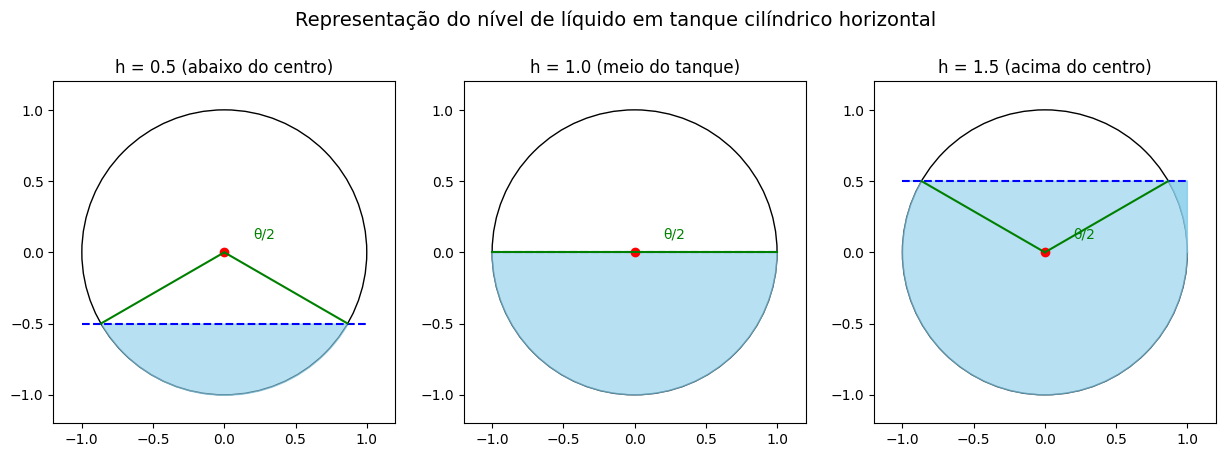

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def desenhar_tanque(R, h, ax, titulo=""):
    # círculo da seção do tanque
    circle = plt.Circle((0,0), R, fill=False, color='black')
    
    ax.add_artist(circle)

    # linha do nível do líquido
    y_line = -R + h
    ax.hlines(y_line, -R, R, colors='blue', linestyles='--')
    

    # circunferência do tanque
    theta = np.linspace(0, 2*np.pi, 500)
    x = R*np.cos(theta)
    y_circle = R*np.sin(theta)

    # preencher líquido
    #ax.fill_between(x, y_circle, y_line, where=(y_circle>=y_line), color='skyblue', alpha=0.6)
    ax.fill_between(x, y_circle, y_line, where=(y_circle<=y_line), color='skyblue', alpha=0.6)

    # marcar centro
    ax.plot(0,0,'ro')

    # se o nível estiver dentro do círculo, mostrar linhas auxiliares
    if -R < y_line < R:
        x_int = np.sqrt(R**2 - y_line**2)
        ax.plot([0, -x_int],[0, y_line],'g-')
        ax.plot([0, x_int],[0, y_line],'g-')
        ax.text(0.2,0.1,"θ/2",color='green')

    ax.set_aspect('equal')
    ax.set_xlim(-R-0.2, R+0.2)
    ax.set_ylim(-R-0.2, R+0.2)
    ax.set_title(titulo)

# parâmetros
R = 1.0
h1, h2, h3 = 0.5, 1.0, 1.5   # abaixo, no centro, acima

fig, axes = plt.subplots(1,3,figsize=(15,5))

desenhar_tanque(R, h1, axes[0], titulo=f"h = {h1} (abaixo do centro)")
desenhar_tanque(R, h2, axes[1], titulo=f"h = {h2} (meio do tanque)")
desenhar_tanque(R, h3, axes[2], titulo=f"h = {h3} (acima do centro)")

plt.suptitle("Representação do nível de líquido em tanque cilíndrico horizontal", fontsize=14)
plt.show()


__Volume de um tanque cilíndrico horizontal (seção circular)__

Agora, podemos calcular o volume de um tanque cílindrico horizontal. O código em Python mostra esse _script_.

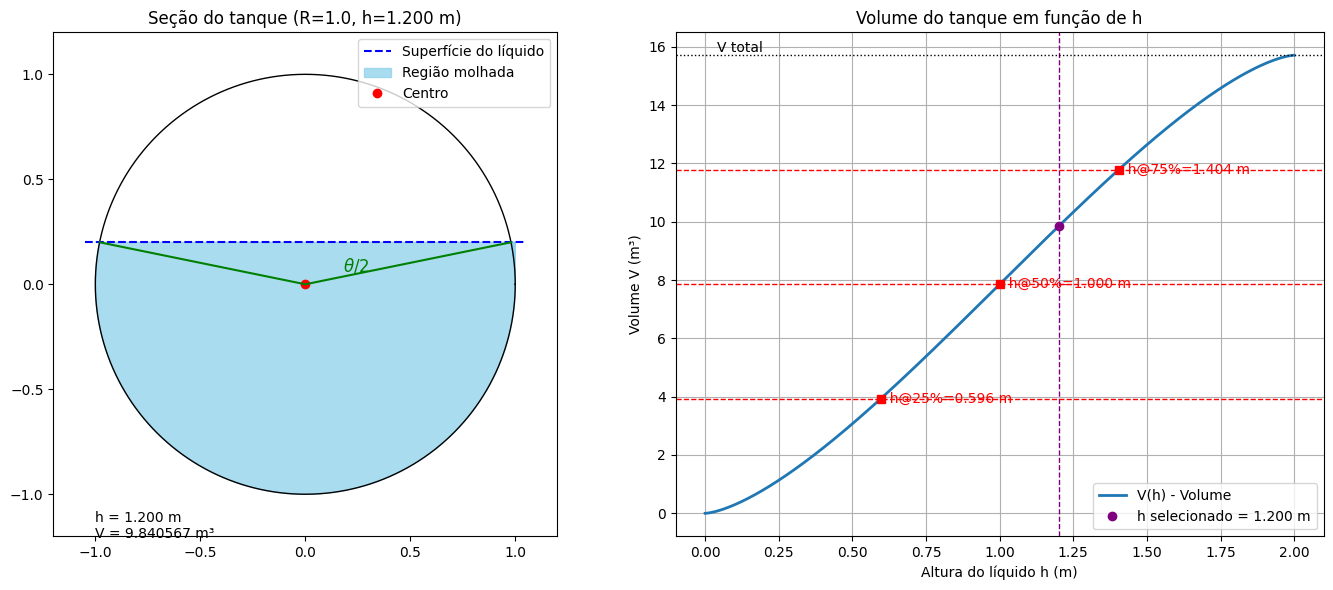

Parâmetros: R = 1.0 m, L = 5.0 m, altura selecionada h = 1.2 m
Volume selecionado: V(h) = 9.840567 m³
Altura que dá 25% do volume total: h = 0.596027 m
Altura que dá 50% do volume total: h = 1.000000 m
Altura que dá 75% do volume total: h = 1.403973 m


In [8]:
"""
Volume de um tanque cilíndrico horizontal (seção circular)
Script completo: cálculo de A(h), V(h), inversa por bisseção e visualizações.
"""

import math
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Funções geométricas / numéricas
# ---------------------------
def area_segmento(R, h):
    """
    Área do segmento circular em função do raio R e altura h (medida do fundo).
    Retorna A(h) para 0 <= h <= 2R.
    """
    if h <= 0:
        return 0.0
    if h >= 2*R:
        return math.pi * R * R
    # expressão estável em termos de h
    # arccos((R-h)/R) e sqrt(2Rh - h^2) = sqrt(h(2R-h))
    val = R**2 * math.acos((R - h) / R) - (R - h) * math.sqrt(max(0.0, 2*R*h - h*h))
    return val

def volume_tanque(R, h, L):
    """
    Volume do líquido no tanque (área do segmento * comprimento L)
    """
    return area_segmento(R, h) * L

def encontrar_h_por_volume(R, L, V_target, tol=1e-8, max_iter=80):
    """
    Encontra h tal que volume_tanque(R, h, L) = V_target usando bisseção
    Retorna None se V_target estiver fora do intervalo [0, V_total]
    """
    a, b = 0.0, 2.0 * R
    fa = volume_tanque(R, a, L) - V_target
    fb = volume_tanque(R, b, L) - V_target
    if abs(fa) < tol:
        return a
    if abs(fb) < tol:
        return b
    if fa * fb > 0:
        return None  # fora do intervalo
    for _ in range(max_iter):
        m = 0.5 * (a + b)
        fm = volume_tanque(R, m, L) - V_target
        if abs(fm) < tol:
            return m
        if fa * fm <= 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
    return 0.5 * (a + b)

# ---------------------------
# Função de plotagem principal
# ---------------------------
def plotar_tanque_e_volume(R=1.0, L=5.0, h_selected=1.2, fractions=(0.25, 0.5, 0.75),
                           n_points=400, savefig=None):
    """
    Gera figura com:
      - à esquerda: seção circular preenchida até h_selected
      - à direita: gráfico V(h) com marcações e pontos das frações
    Parâmetros:
      R, L           : raio e comprimento do tanque
      h_selected     : altura a destacar no desenho
      fractions      : frações do volume total a marcar (tupla)
      n_points       : resolução do gráfico V(h)
      savefig        : caminho para salvar a figura (ex.: 'fig.png'), ou None
    """
    # Malha de h e volumes
    h_vals = np.linspace(0.0, 2.0*R, n_points)
    V_vals = np.array([volume_tanque(R, h, L) for h in h_vals])
    V_total = volume_tanque(R, 2.0*R, L)
    V_selected = volume_tanque(R, h_selected, L)

    # Encontrar h que corresponde a cada fração
    V_marks = [f * V_total for f in fractions]
    h_for_fractions = [encontrar_h_por_volume(R, L, Vf) for Vf in V_marks]

    # Preparar figura
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- (1) Seção circular preenchida ---
    ax = axes[0]
    theta = np.linspace(0, 2*np.pi, 1000)
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    ax.plot(x, y, color='black', linewidth=1.0)

    y_line = -R + h_selected
    ax.hlines(y_line, -R-0.05, R+0.05, colors='blue', linestyles='--', label='Superfície do líquido')
    #ax.fill_between(x, y, y_line, where=(y >= y_line), color='skyblue', alpha=0.7, label='Região molhada')
    ax.fill_between(x, y, y_line, where=(y <= y_line), color='skyblue', alpha=0.7, label='Região molhada')
    ax.plot(0, 0, 'ro', label='Centro')

    # Triângulo para ângulo (apenas se a linha cortar dentro da circunferência)
    if -R < y_line < R:
        x_int = math.sqrt(max(0.0, R**2 - y_line**2))
        ax.plot([0, -x_int], [0, y_line], 'g-')
        ax.plot([0, x_int], [0, y_line], 'g-')
        ax.text(0.18*R, 0.06*R, r'$\theta/2$', color='green', fontsize=12)

    ax.set_aspect('equal')
    ax.set_xlim(-R-0.2, R+0.2)
    ax.set_ylim(-R-0.2, R+0.2)
    ax.set_title(f"Seção do tanque (R={R}, h={h_selected:.3f} m)")
    ax.legend(loc='upper right')
    ax.text(-R, -R-0.08, f"h = {h_selected:.3f} m\nV = {V_selected:.6f} m³", fontsize=10, va='top')

    # --- (2) Gráfico V(h) ---
    ax2 = axes[1]
    ax2.plot(h_vals, V_vals, label='V(h) - Volume', linewidth=2)
    ax2.set_xlabel('Altura do líquido h (m)')
    ax2.set_ylabel('Volume V (m³)')
    ax2.set_title('Volume do tanque em função de h')

    # Marcar h selecionado
    ax2.axvline(x=h_selected, color='purple', linestyle='--', linewidth=1)
    ax2.plot([h_selected], [V_selected], 'o', color='purple', label=f'h selecionado = {h_selected:.3f} m')

    # Linhas horizontais e pontos para frações
    for f, Vmark, hsol in zip(fractions, V_marks, h_for_fractions):
        ax2.axhline(y=Vmark, color='red', linestyle='--', linewidth=1)
        if hsol is not None:
            ax2.plot([hsol], [Vmark], 's', color='red')
            ax2.text(hsol, Vmark, f"  h@{int(f*100)}%={hsol:.3f} m", va='center', color='red')
        else:
            ax2.text(1.02*2*R, Vmark, f"{int(f*100)}% V (fora)", va='center', color='red')

    # V total
    ax2.axhline(y=V_total, color='k', linestyle=':', linewidth=1)
    ax2.text(0.02*2*R, V_total, "V total", va='bottom')

    ax2.grid(True)
    ax2.legend()
    plt.tight_layout()

    if savefig:
        plt.savefig(savefig, dpi=300, bbox_inches='tight')
    plt.show()

    # Impressão dos resultados resumidos
    print(f"Parâmetros: R = {R} m, L = {L} m, altura selecionada h = {h_selected} m")
    print(f"Volume selecionado: V(h) = {V_selected:.6f} m³")
    for f, hsol in zip(fractions, h_for_fractions):
        if hsol is not None:
            print(f"Altura que dá {int(f*100)}% do volume total: h = {hsol:.6f} m")
        else:
            print(f"Altura para {int(f*100)}%: não encontrada no intervalo [0, 2R].")

# ---------------------------
# Exemplo de uso (padrão)
# ---------------------------
if __name__ == "__main__":
    # Parâmetros que você pode alterar
    R = 1.0         # raio em metros
    L = 5.0         # comprimento em metros
    h_selected = 1.2  # altura que será destacada no desenho

    # Gera gráfico e saídas
    plotar_tanque_e_volume(R=R, L=L, h_selected=h_selected, savefig=None)


__Uso do PySimpleGUI para criar uma janela com__:

- painel esquerdo: controles de entrada ($R$, $L$, altura $ℎ$ ou volume desejado) e botões;
- painel direito: gráficos lado a lado — seção circular preenchida (mostrando região molhada) e gráfico $V(h)$ com marcações;
- mostra o volume calculado (ou encontra a altura $h$ para um volume dado);
- botão para salvar a figura.

In [21]:
"""
tanque_gui_fixed.py
Versão ajustada do tanque_gui.py:
- evita recalcular/desenhar em cada timeout (isso impedia digitar nas entradas)
- usa pack_forget()/destroy() para remover o widget matplotlib anterior
"""

import math
import io
import numpy as np
import matplotlib
matplotlib.use('TkAgg')   # usa backend TkAgg para integração com PySimpleGUI
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import PySimpleGUI as sg

# ---------------------------
# Funções matemáticas
# ---------------------------
def area_segmento(R, h):
    if h <= 0:
        return 0.0
    if h >= 2*R:
        return math.pi * R * R
    return R**2 * math.acos((R - h) / R) - (R - h) * math.sqrt(max(0.0, 2*R*h - h*h))

def volume_tanque(R, h, L):
    return area_segmento(R, h) * L

def encontrar_h_por_volume(R, L, V_target, tol=1e-8, max_iter=80):
    a, b = 0.0, 2.0 * R
    fa = volume_tanque(R, a, L) - V_target
    fb = volume_tanque(R, b, L) - V_target
    if abs(fa) < tol:
        return a
    if abs(fb) < tol:
        return b
    if fa * fb > 0:
        return None
    for _ in range(max_iter):
        m = 0.5 * (a + b)
        fm = volume_tanque(R, m, L) - V_target
        if abs(fm) < tol:
            return m
        if fa * fm <= 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
    return 0.5 * (a + b)

# ---------------------------
# Funções utilitárias de plotagem integradas ao PySimpleGUI
# ---------------------------
def draw_figure(canvas, figure):
    """Desenha um matplotlib.figure.Figure em um elemento Canvas do PySimpleGUI."""
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    widget = figure_canvas_agg.get_tk_widget()
    widget.pack(side='top', fill='both', expand=1)
    return figure_canvas_agg

def clear_canvas(canvas_agg):
    """Remove o widget matplotlib anterior do TK corretamente."""
    try:
        widget = canvas_agg.get_tk_widget()
        # remove da geometria e destrói o widget
        widget.pack_forget()
        widget.destroy()
        plt.close('all')
    except Exception:
        pass

# ---------------------------
# Layout da janela
# ---------------------------
sg.theme('LightBlue2')

layout = [
    [sg.Text('Parâmetros do tanque', font=('Helvetica', 12, 'bold'))],
    [sg.Text('Raio R (m):', size=(12,1)), sg.Input('1.0', key='-R-', size=(10,1))],
    [sg.Text('Comprimento L (m):', size=(12,1)), sg.Input('5.0', key='-L-', size=(10,1))],
    [sg.HorizontalSeparator()],
    [sg.Text('Calcular a partir de:', font=('Helvetica', 11))],
    [sg.Radio('Altura h (m)', "RADIO1", default=True, key='-RADIO-H-'),
     sg.Radio('Volume V (m³) — encontra h', "RADIO1", default=False, key='-RADIO-V-')],
    [sg.Text('h (m):', size=(12,1)), sg.Input('1.2', key='-H-', size=(10,1))],
    [sg.Text('V (m³):', size=(12,1)), sg.Input('', key='-V-', size=(10,1))],
    [sg.Button('Calcular / Atualizar', key='-CALC-'), sg.Button('Salvar figura', key='-SAVE-'), sg.Button('Sair')],
    [sg.HorizontalSeparator()],
    [sg.Text('Resultados:', font=('Helvetica', 11, 'bold'))],
    [sg.Multiline('', size=(40,6), key='-OUT-', disabled=True)]
]

# Colunas: controles à esquerda, canvas de plot à direita
layout_full = [
    [
        sg.Column(layout, vertical_alignment='top'),
        sg.VSeparator(),
        sg.Column([[sg.Text('Visualização', font=('Helvetica', 12, 'bold'))],
                   [sg.Canvas(key='-CANVAS-', size=(700,400))]], vertical_alignment='top')
    ]
]

window = sg.Window('Volume - Tanque Cilíndrico Horizontal', layout_full, finalize=True, element_justification='center', resizable=True)

# Preparar espaço para figura
canvas_elem = window['-CANVAS-']
canvas = canvas_elem.TKCanvas
fig_agg = None
fig = None  # referência à figura atual (para salvar)

# Função que cria figura matplotlib e retorna o objeto Figure
def criar_figura(R, L, h_selected, n_points=400, fractions=(0.25, 0.5, 0.75)):
    h_vals = np.linspace(0.0, 2.0*R, n_points)
    V_vals = np.array([volume_tanque(R, h, L) for h in h_vals])
    V_total = volume_tanque(R, 2.0*R, L)
    V_selected = volume_tanque(R, h_selected, L)

    fig = plt.Figure(figsize=(8,4), dpi=100)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    # --- Seção preenchida (ax1) ---
    theta = np.linspace(0, 2*np.pi, 800)
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    ax1.plot(x, y, color='black', linewidth=1.0)
    y_line = -R + h_selected
    ax1.hlines(y_line, -R-0.05, R+0.05, colors='blue', linestyles='--', label='Superfície do líquido')
    ax1.fill_between(x, y, y_line, where=(y >= y_line), color='skyblue', alpha=0.7, label='Região molhada')
    ax1.plot(0, 0, 'ro', label='Centro')
    if -R < y_line < R:
        x_int = math.sqrt(max(0.0, R**2 - y_line**2))
        ax1.plot([0, -x_int], [0, y_line], 'g-')
        ax1.plot([0, x_int], [0, y_line], 'g-')
        ax1.text(0.18*R, 0.06*R, r'$\theta/2$', color='green', fontsize=10)
    ax1.set_aspect('equal')
    ax1.set_xlim(-R-0.25, R+0.25)
    ax1.set_ylim(-R-0.25, R+0.25)
    ax1.set_title(f"Seção (R={R}, h={h_selected:.3f} m)")

    # --- Gráfico V(h) (ax2) ---
    ax2.plot(h_vals, V_vals, label='V(h) - Volume', linewidth=2)
    ax2.set_xlabel('Altura do líquido h (m)')
    ax2.set_ylabel('Volume V (m³)')
    ax2.set_title('Volume do tanque em função de h')
    ax2.grid(True)

    # marca h selecionado
    ax2.axvline(x=h_selected, color='purple', linestyle='--', linewidth=1)
    ax2.plot([h_selected], [V_selected], 'o', color='purple', label=f'h sel. = {h_selected:.3f} m')

    # frações
    V_marks = [f * V_total for f in fractions]
    for f, Vmark in zip(fractions, V_marks):
        ax2.axhline(y=Vmark, color='red', linestyle='--', linewidth=1)
    ax2.legend()

    fig.tight_layout()
    return fig, V_selected, V_total, h_vals, V_vals

# Loop de eventos
while True:
    # NÃO usamos timeout para recalcular: somente respondemos a eventos explícitos
    event, values = window.read()
    if event in (sg.WIN_CLOSED, 'Sair'):
        break

    if event == '-CALC-':
        # ler entradas com tratamento de erros
        try:
            R = float(values['-R-'])
            L = float(values['-L-'])
            if R <= 0 or L <= 0:
                raise ValueError("R e L devem ser positivos.")
        except Exception as e:
            window['-OUT-'].update(f"Erro nos parâmetros R/L: {e}\n", append=True)
            continue

        modo_h = values['-RADIO-H-']
        modo_v = values['-RADIO-V-']

        # decidir operação
        if modo_h:
            # calcular volume a partir de h informado
            try:
                h_in = float(values['-H-'])
            except:
                window['-OUT-'].update("Valor de h inválido.\n", append=True)
                continue
            if h_in < 0 or h_in > 2*R:
                window['-OUT-'].update(f"h fora do intervalo [0, {2*R}].\n", append=True)
                continue
            h_selected = h_in
            V_selected = volume_tanque(R, h_selected, L)
            out_text = f"Entrada: h = {h_selected:.6f} m\nVolume calculado: V = {V_selected:.6f} m³\n"
        else:
            # modo: informar volume e encontrar h por bisseção
            try:
                V_in = float(values['-V-'])
            except:
                window['-OUT-'].update("Valor de V inválido.\n", append=True)
                continue
            V_total_guess = volume_tanque(R, 2*R, L)
            if V_in < 0 or V_in > V_total_guess:
                window['-OUT-'].update(f"V deve estar em [0, {V_total_guess:.6f}].\n", append=True)
                continue
            h_sol = encontrar_h_por_volume(R, L, V_in)
            if h_sol is None:
                window['-OUT-'].update("Não foi possível encontrar h para esse V.\n", append=True)
                continue
            h_selected = h_sol
            V_selected = V_in
            out_text = f"Entrada: V = {V_selected:.6f} m³\nAltura encontrada: h = {h_selected:.6f} m\n"

        # criar figura
        try:
            fig, Vsel, Vtotal, _, _ = criar_figura(R, L, h_selected)
        except Exception as e:
            window['-OUT-'].update(f"Erro ao criar figura: {e}\n", append=True)
            continue

        # atualizar saída numérica
        window['-OUT-'].update(out_text)

        # desenhar no canvas (limpar anterior)
        if fig_agg:
            clear_canvas(fig_agg)
            fig_agg = None
        fig_agg = draw_figure(canvas, fig)

    if event == '-SAVE-':
        # salvar figura atual
        if fig is not None:
            save_path = sg.popup_get_file('Salvar figura como', save_as=True, file_types=(("PNG Files","*.png"), ("PDF Files","*.pdf")), default_extension='png')
            if save_path:
                try:
                    fig.savefig(save_path, dpi=300, bbox_inches='tight')
                    sg.popup(f'Figura salva em {save_path}')
                except Exception as e:
                    sg.popup_error(f'Erro ao salvar: {e}')
        else:
            sg.popup('Nenhuma figura gerada ainda. Clique em "Calcular / Atualizar".')

# Encerrar
if fig_agg:
    clear_canvas(fig_agg)
window.close()

<img src="img/Tela_controle_tanque.png" alt="UESC" style="width: 1000px; display: block; margin: 0 auto 5px auto;">
<p style="text-align: center;"><strong>Figura: Resultado da simulação - Tela de Controle Volume de um Tanque .</strong></p>

Abaxo o código acima que esta rodando.

__RESUMO__:

Um tanque cilíndrico deitado pode ser modelado como um cilindro com **seção circular** e **comprimento constante** $L$.  
O volume de fluido no interior depende da **altura do líquido** $h$ (medida a partir do fundo do tanque).

__Área do segmento circular__

A área molhada da seção é dada pelo **segmento circular**:

$$
A(h) \;=\; 
\begin{cases}
0, & h \leq 0 \\[6pt]
\pi R^2, & h \geq 2R \\[6pt]
R^2 \arccos\!\left(\dfrac{R-h}{R}\right) \;-\; (R-h)\sqrt{\,2Rh - h^2\,}, & 0 < h < 2R
\end{cases}
$$

onde:

- $R$ é o raio do tanque,
- $h$ é a altura do fluido medida a partir do fundo.

Essa expressão é estável e funciona tanto para $h < R$ (abaixo do centro do círculo) quanto para $h > R$ (acima do centro).

__Volume do tanque__

O volume de líquido é a área da seção multiplicada pelo comprimento $L$:

$$
V(h) = A(h)\,L
$$

__Volume total__

Quando o tanque está completamente cheio ($h = 2R$), temos:

$$
V_{\text{total}} = \pi R^2 \, L
$$

__Problema inverso: encontrar $h$ dado $V$.__

Dado um volume $V$, podemos encontrar a altura correspondente $h$ resolvendo a equação:

$$
V = A(h) \, L
$$

Essa equação não tem solução analítica simples para $h$, mas pode ser resolvida numericamente (por exemplo, usando o método da **bisseção**).

In [ ]:
import math

def area_segmento(R, h):
    if h <= 0:
        return 0.0
    if h >= 2*R:
        return math.pi * R*R
    theta = 2*math.acos((R-h)/R)
    return 0.5 * R*R * (theta - math.sin(theta))

def volume_tanque(R, h, L):
    return area_segmento(R,h) * L

# Exemplo
R = 1.0      # raio em m
h = 0.8      # altura do líquido em m
L = 5.0      # comprimento do tanque em m

A = area_segmento(R,h)
V = volume_tanque(R,h,L)
print(f"Área = {A:.6f} m^2, Volume = {V:.6f} m^3")


Área = 1.173479 m^2, Volume = 5.867396 m^3


: 

__Guia rápido – Instalação do PySimpleGUI para os exercícios__

O **PySimpleGUI** passou recentemente por mudanças importantes:

- As versões **4.x** (como a 4.60.5, muito usada em exemplos de ensino) foram **removidas do PyPI (yanked)**.  
- O autor migrou o pacote oficial para um **servidor privado**, onde está disponível a versão **5.x**.  
- A versão **5.x** adota um novo **modelo de licenciamento** (pode exigir chave em alguns casos).  

Para fins de **ensino e aprendizado**, é recomendado instalar a versão aberta e compatível **PySimpleGUI-4-foss**, que mantém as funcionalidades da versão 4.x e não exige chave.

> Para rodar os exemplos do curso, instale a versão **PySimpleGUI-4-foss**, própria para estudo.

__Passos para instalação__

1. **Desinstalar** qualquer versão anterior:
```python
python -m pip uninstall -y PySimpleGUI
python -m pip cache purge

```

2 - __Instalar a versão FOSS__ (Free and Open Source) diretamente do repositório alternativo:

```python
pip install PySimpleGUI-4-foss
````

3 - Testar a instalação:

````python
python -c "import PySimpleGUI as sg; print('Versão:', sg.__version__)"
````

Se a instalação estiver correta, será exibido algo como:

````python
Versão: 4.60.5-foss

````

__Guia rápido – Instalação do PySimpleGUI para os exercícios__

Para rodar os exemplos do curso, instale a versão **PySimpleGUI-4-foss**, própria para estudo.  

__Passos__:

```python
__1. Remover versões antigas__
python -m pip uninstall -y PySimpleGUI
python -m pip cache purge

__2. Instalar a versão de estudo (FOSS)__
pip install PySimpleGUI-4-foss

__3. Testar a instalação__
python -c "import PySimpleGUI as sg; print('Versão instalada:', sg.__version__)"

Se tudo deu certo, a saída será algo parecido com:

Versão instalada: 4.60.5-foss
